In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data into dataframe
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
#Shape of dataframe
data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


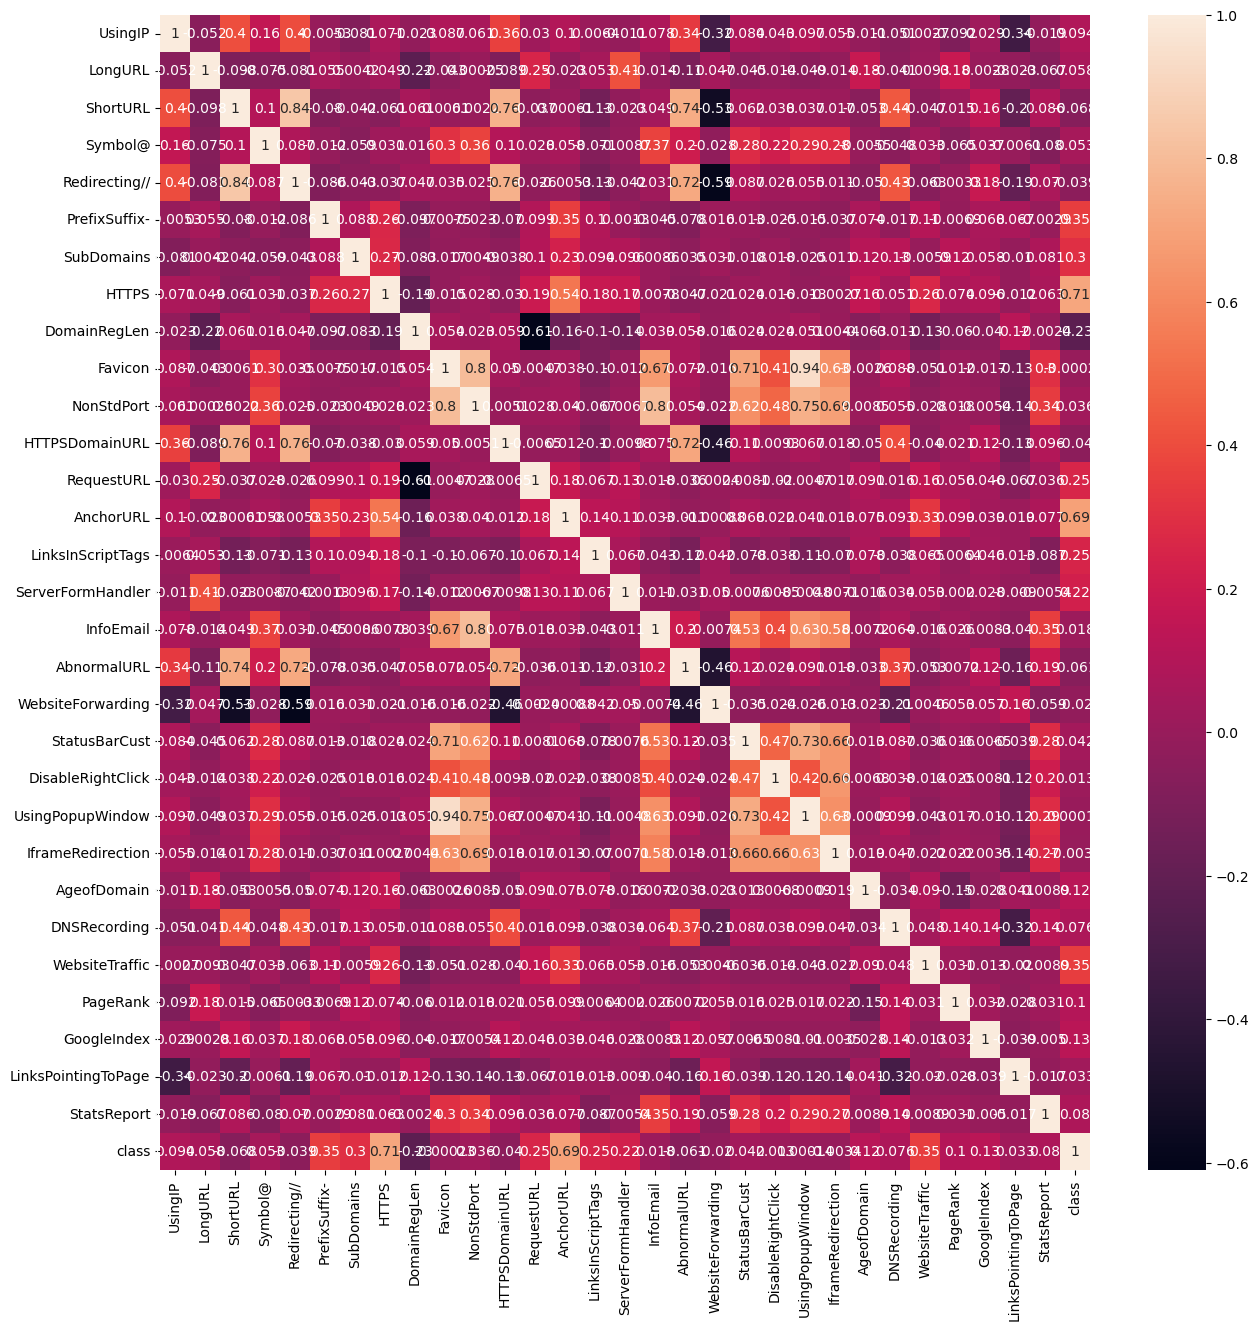

In [10]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

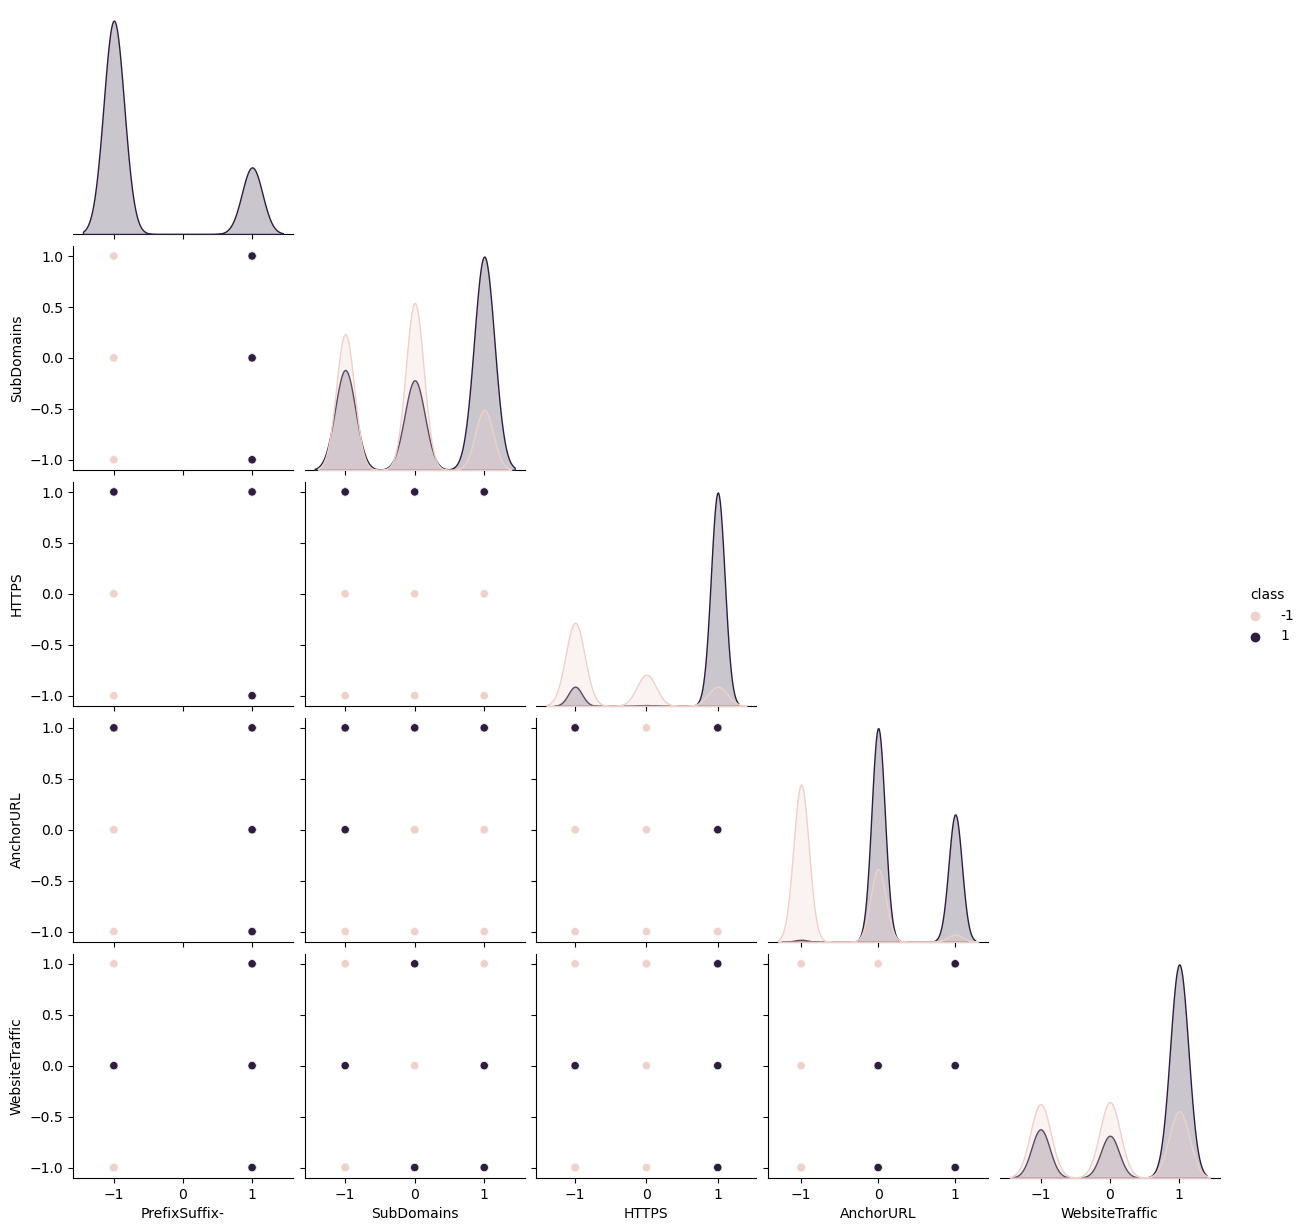

In [11]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


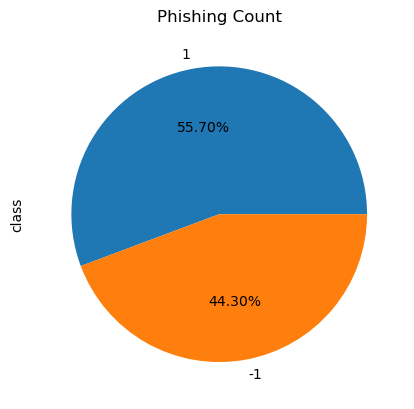

In [12]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [13]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [14]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [15]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [16]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [17]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [18]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [19]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [20]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [21]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [23]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [24]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



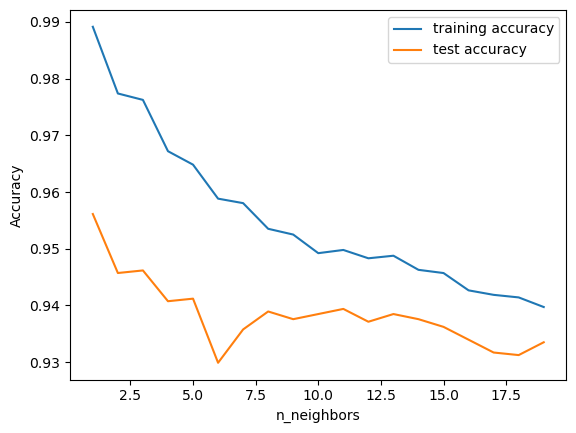

In [25]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [26]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [27]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [28]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [29]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [30]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [31]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [32]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [33]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [35]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [36]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [37]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [38]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [39]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.957

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.962

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.960

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.964


In [40]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



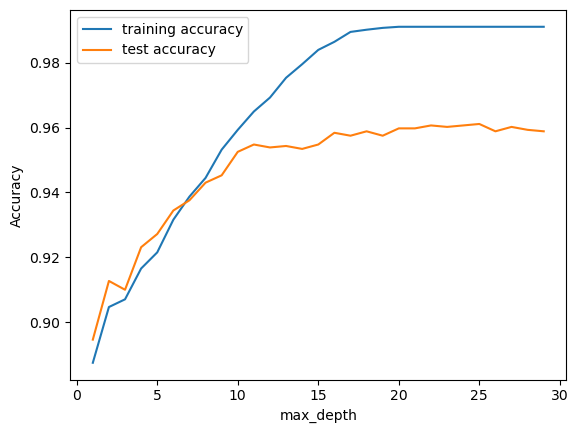

In [41]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [42]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [43]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [45]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.965

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.968

Random Forest : Recall on training Data: 0.992
Random Forest : Recall on test Data: 0.967

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.964


In [46]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



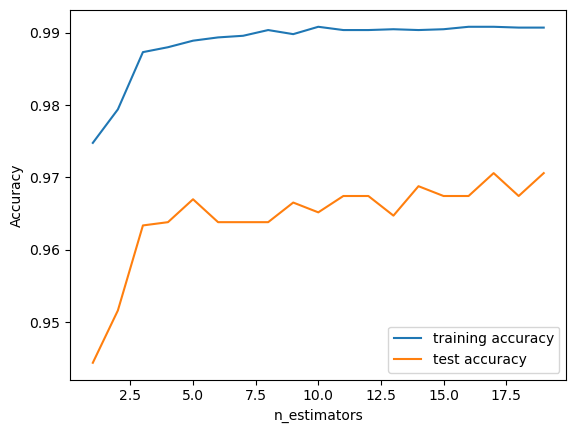

In [47]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [48]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [49]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [50]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [51]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [52]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



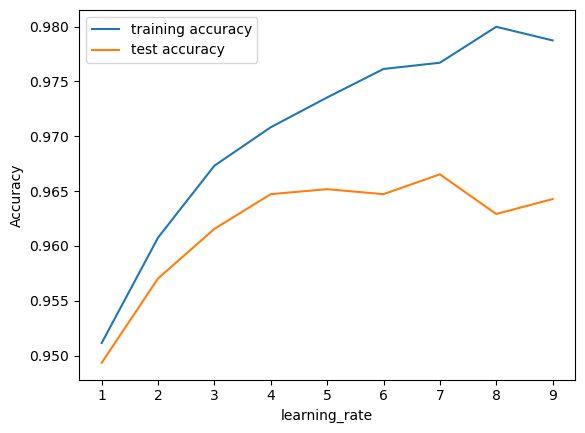

In [53]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

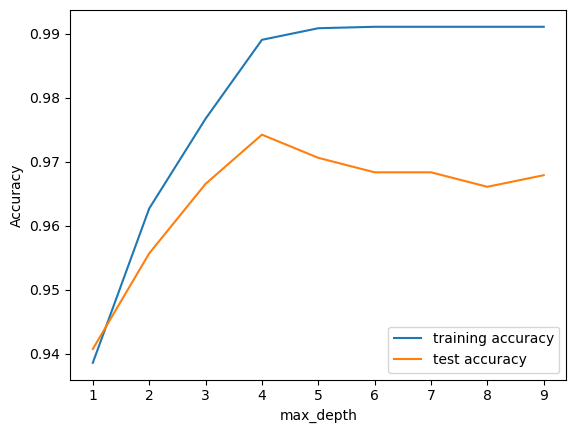

In [54]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [55]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [56]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 164ms	remaining: 2m 43s
1:	learn: 0.4349357	total: 177ms	remaining: 1m 28s
2:	learn: 0.3609236	total: 190ms	remaining: 1m 2s
3:	learn: 0.3050829	total: 202ms	remaining: 50.3s
4:	learn: 0.2766620	total: 214ms	remaining: 42.6s
5:	learn: 0.2475476	total: 225ms	remaining: 37.3s
6:	learn: 0.2286637	total: 234ms	remaining: 33.3s
7:	learn: 0.2138754	total: 243ms	remaining: 30.1s
8:	learn: 0.2013643	total: 251ms	remaining: 27.7s
9:	learn: 0.1896378	total: 260ms	remaining: 25.7s
10:	learn: 0.1819539	total: 268ms	remaining: 24.1s
11:	learn: 0.1767867	total: 274ms	remaining: 22.6s
12:	learn: 0.1727735	total: 280ms	remaining: 21.3s
13:	learn: 0.1682578	total: 284ms	remaining: 20s
14:	learn: 0.1641759	total: 288ms	remaining: 18.9s
15:	learn: 0.1614218	total: 292ms	remaining: 17.9s
16:	learn: 0.1558968	total: 296ms	remaining: 17.1s
17:	learn: 0.1535881	total: 299ms	remaining: 16.3s
18:	learn: 0.1514228	total: 303ms	remaining: 15.7s
19:	learn: 0.1482580	total: 307ms	remaini

183:	learn: 0.0522311	total: 946ms	remaining: 4.19s
184:	learn: 0.0519353	total: 950ms	remaining: 4.18s
185:	learn: 0.0515714	total: 954ms	remaining: 4.18s
186:	learn: 0.0514909	total: 958ms	remaining: 4.17s
187:	learn: 0.0513162	total: 962ms	remaining: 4.16s
188:	learn: 0.0511884	total: 966ms	remaining: 4.14s
189:	learn: 0.0510652	total: 970ms	remaining: 4.14s
190:	learn: 0.0509786	total: 974ms	remaining: 4.13s
191:	learn: 0.0508893	total: 978ms	remaining: 4.12s
192:	learn: 0.0505900	total: 982ms	remaining: 4.11s
193:	learn: 0.0504426	total: 986ms	remaining: 4.09s
194:	learn: 0.0502767	total: 990ms	remaining: 4.08s
195:	learn: 0.0500644	total: 994ms	remaining: 4.08s
196:	learn: 0.0499431	total: 997ms	remaining: 4.06s
197:	learn: 0.0498418	total: 1s	remaining: 4.05s
198:	learn: 0.0497734	total: 1s	remaining: 4.04s
199:	learn: 0.0496759	total: 1.01s	remaining: 4.03s
200:	learn: 0.0494923	total: 1.01s	remaining: 4.02s
201:	learn: 0.0493402	total: 1.02s	remaining: 4.01s
202:	learn: 0.0492

389:	learn: 0.0327366	total: 1.73s	remaining: 2.71s
390:	learn: 0.0326258	total: 1.74s	remaining: 2.71s
391:	learn: 0.0326089	total: 1.74s	remaining: 2.7s
392:	learn: 0.0325731	total: 1.75s	remaining: 2.7s
393:	learn: 0.0325410	total: 1.75s	remaining: 2.69s
394:	learn: 0.0325172	total: 1.75s	remaining: 2.69s
395:	learn: 0.0324639	total: 1.76s	remaining: 2.68s
396:	learn: 0.0324274	total: 1.76s	remaining: 2.67s
397:	learn: 0.0323686	total: 1.76s	remaining: 2.67s
398:	learn: 0.0323451	total: 1.77s	remaining: 2.66s
399:	learn: 0.0323018	total: 1.77s	remaining: 2.66s
400:	learn: 0.0322754	total: 1.78s	remaining: 2.65s
401:	learn: 0.0322375	total: 1.78s	remaining: 2.65s
402:	learn: 0.0322034	total: 1.78s	remaining: 2.64s
403:	learn: 0.0321289	total: 1.79s	remaining: 2.64s
404:	learn: 0.0320859	total: 1.79s	remaining: 2.63s
405:	learn: 0.0320485	total: 1.79s	remaining: 2.63s
406:	learn: 0.0320104	total: 1.8s	remaining: 2.62s
407:	learn: 0.0319307	total: 1.8s	remaining: 2.62s
408:	learn: 0.03

552:	learn: 0.0273534	total: 2.35s	remaining: 1.9s
553:	learn: 0.0273206	total: 2.35s	remaining: 1.89s
554:	learn: 0.0273206	total: 2.35s	remaining: 1.89s
555:	learn: 0.0272855	total: 2.36s	remaining: 1.88s
556:	learn: 0.0272855	total: 2.36s	remaining: 1.88s
557:	learn: 0.0272748	total: 2.37s	remaining: 1.87s
558:	learn: 0.0272470	total: 2.37s	remaining: 1.87s
559:	learn: 0.0272083	total: 2.37s	remaining: 1.86s
560:	learn: 0.0271917	total: 2.38s	remaining: 1.86s
561:	learn: 0.0271917	total: 2.38s	remaining: 1.85s
562:	learn: 0.0271917	total: 2.38s	remaining: 1.85s
563:	learn: 0.0271917	total: 2.39s	remaining: 1.84s
564:	learn: 0.0271842	total: 2.39s	remaining: 1.84s
565:	learn: 0.0271671	total: 2.39s	remaining: 1.84s
566:	learn: 0.0271555	total: 2.4s	remaining: 1.83s
567:	learn: 0.0271357	total: 2.4s	remaining: 1.83s
568:	learn: 0.0271357	total: 2.4s	remaining: 1.82s
569:	learn: 0.0271357	total: 2.41s	remaining: 1.82s
570:	learn: 0.0271353	total: 2.41s	remaining: 1.81s
571:	learn: 0.02

715:	learn: 0.0253414	total: 2.94s	remaining: 1.17s
716:	learn: 0.0253414	total: 2.94s	remaining: 1.16s
717:	learn: 0.0253413	total: 2.95s	remaining: 1.16s
718:	learn: 0.0253413	total: 2.95s	remaining: 1.15s
719:	learn: 0.0253413	total: 2.96s	remaining: 1.15s
720:	learn: 0.0253413	total: 2.96s	remaining: 1.15s
721:	learn: 0.0253299	total: 2.96s	remaining: 1.14s
722:	learn: 0.0253299	total: 2.97s	remaining: 1.14s
723:	learn: 0.0253213	total: 2.97s	remaining: 1.13s
724:	learn: 0.0253213	total: 2.98s	remaining: 1.13s
725:	learn: 0.0253213	total: 2.98s	remaining: 1.13s
726:	learn: 0.0253210	total: 2.98s	remaining: 1.12s
727:	learn: 0.0253209	total: 2.99s	remaining: 1.12s
728:	learn: 0.0253208	total: 2.99s	remaining: 1.11s
729:	learn: 0.0253076	total: 3s	remaining: 1.11s
730:	learn: 0.0253037	total: 3s	remaining: 1.1s
731:	learn: 0.0252795	total: 3s	remaining: 1.1s
732:	learn: 0.0252616	total: 3.01s	remaining: 1.1s
733:	learn: 0.0252356	total: 3.01s	remaining: 1.09s
734:	learn: 0.0252356	to

899:	learn: 0.0247603	total: 3.76s	remaining: 417ms
900:	learn: 0.0247310	total: 3.76s	remaining: 413ms
901:	learn: 0.0247310	total: 3.77s	remaining: 409ms
902:	learn: 0.0247310	total: 3.77s	remaining: 405ms
903:	learn: 0.0247310	total: 3.77s	remaining: 401ms
904:	learn: 0.0247310	total: 3.78s	remaining: 397ms
905:	learn: 0.0247309	total: 3.79s	remaining: 393ms
906:	learn: 0.0247309	total: 3.79s	remaining: 389ms
907:	learn: 0.0247307	total: 3.79s	remaining: 384ms
908:	learn: 0.0247305	total: 3.8s	remaining: 380ms
909:	learn: 0.0247305	total: 3.8s	remaining: 376ms
910:	learn: 0.0247305	total: 3.81s	remaining: 372ms
911:	learn: 0.0247305	total: 3.81s	remaining: 368ms
912:	learn: 0.0247305	total: 3.82s	remaining: 364ms
913:	learn: 0.0247305	total: 3.82s	remaining: 360ms
914:	learn: 0.0247117	total: 3.83s	remaining: 356ms
915:	learn: 0.0247116	total: 3.83s	remaining: 351ms
916:	learn: 0.0247117	total: 3.84s	remaining: 347ms
917:	learn: 0.0247114	total: 3.84s	remaining: 343ms
918:	learn: 0.

In [57]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [58]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [59]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [60]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 5.74ms	remaining: 5.73s
1:	learn: 0.4349357	total: 13.9ms	remaining: 6.93s
2:	learn: 0.3609236	total: 21.5ms	remaining: 7.14s
3:	learn: 0.3050829	total: 29.3ms	remaining: 7.29s
4:	learn: 0.2766620	total: 37.1ms	remaining: 7.38s
5:	learn: 0.2475476	total: 44.7ms	remaining: 7.4s
6:	learn: 0.2286637	total: 52ms	remaining: 7.37s
7:	learn: 0.2138754	total: 59.2ms	remaining: 7.33s
8:	learn: 0.2013643	total: 65.1ms	remaining: 7.17s
9:	learn: 0.1896378	total: 70.7ms	remaining: 7s
10:	learn: 0.1819539	total: 75.9ms	remaining: 6.82s
11:	learn: 0.1767867	total: 80.9ms	remaining: 6.66s
12:	learn: 0.1727735	total: 85.9ms	remaining: 6.52s
13:	learn: 0.1682578	total: 90.8ms	remaining: 6.4s
14:	learn: 0.1641759	total: 95.9ms	remaining: 6.3s
15:	learn: 0.1614218	total: 101ms	remaining: 6.23s
16:	learn: 0.1558968	total: 106ms	remaining: 6.15s
17:	learn: 0.1535881	total: 112ms	remaining: 6.09s
18:	learn: 0.1514228	total: 117ms	remaining: 6.03s
19:	learn: 0.1482580	total: 123ms	

163:	learn: 0.0554512	total: 962ms	remaining: 4.9s
164:	learn: 0.0552806	total: 969ms	remaining: 4.9s
165:	learn: 0.0550538	total: 975ms	remaining: 4.9s
166:	learn: 0.0548825	total: 982ms	remaining: 4.9s
167:	learn: 0.0547805	total: 988ms	remaining: 4.89s
168:	learn: 0.0546642	total: 994ms	remaining: 4.89s
169:	learn: 0.0543574	total: 1s	remaining: 4.88s
170:	learn: 0.0542539	total: 1.01s	remaining: 4.88s
171:	learn: 0.0540977	total: 1.01s	remaining: 4.87s
172:	learn: 0.0539741	total: 1.02s	remaining: 4.87s
173:	learn: 0.0537793	total: 1.02s	remaining: 4.86s
174:	learn: 0.0535499	total: 1.03s	remaining: 4.86s
175:	learn: 0.0533461	total: 1.04s	remaining: 4.86s
176:	learn: 0.0531326	total: 1.04s	remaining: 4.85s
177:	learn: 0.0530595	total: 1.05s	remaining: 4.85s
178:	learn: 0.0529470	total: 1.06s	remaining: 4.84s
179:	learn: 0.0527691	total: 1.06s	remaining: 4.84s
180:	learn: 0.0526404	total: 1.07s	remaining: 4.83s
181:	learn: 0.0525145	total: 1.07s	remaining: 4.83s
182:	learn: 0.05243

343:	learn: 0.0352172	total: 1.94s	remaining: 3.7s
344:	learn: 0.0351687	total: 1.95s	remaining: 3.69s
345:	learn: 0.0351475	total: 1.95s	remaining: 3.69s
346:	learn: 0.0350233	total: 1.96s	remaining: 3.68s
347:	learn: 0.0349995	total: 1.96s	remaining: 3.67s
348:	learn: 0.0349414	total: 1.97s	remaining: 3.67s
349:	learn: 0.0349034	total: 1.97s	remaining: 3.66s
350:	learn: 0.0348012	total: 1.98s	remaining: 3.66s
351:	learn: 0.0347637	total: 1.98s	remaining: 3.65s
352:	learn: 0.0347316	total: 1.99s	remaining: 3.64s
353:	learn: 0.0346767	total: 1.99s	remaining: 3.64s
354:	learn: 0.0346415	total: 2s	remaining: 3.63s
355:	learn: 0.0345842	total: 2s	remaining: 3.63s
356:	learn: 0.0344702	total: 2.01s	remaining: 3.62s
357:	learn: 0.0343870	total: 2.02s	remaining: 3.61s
358:	learn: 0.0343532	total: 2.02s	remaining: 3.61s
359:	learn: 0.0342877	total: 2.02s	remaining: 3.6s
360:	learn: 0.0341769	total: 2.03s	remaining: 3.6s
361:	learn: 0.0341559	total: 2.04s	remaining: 3.59s
362:	learn: 0.0340802

537:	learn: 0.0276906	total: 2.98s	remaining: 2.56s
538:	learn: 0.0276736	total: 2.99s	remaining: 2.55s
539:	learn: 0.0276546	total: 2.99s	remaining: 2.55s
540:	learn: 0.0276545	total: 3s	remaining: 2.55s
541:	learn: 0.0276230	total: 3.01s	remaining: 2.54s
542:	learn: 0.0275952	total: 3.02s	remaining: 2.54s
543:	learn: 0.0275801	total: 3.02s	remaining: 2.54s
544:	learn: 0.0275523	total: 3.03s	remaining: 2.53s
545:	learn: 0.0275116	total: 3.04s	remaining: 2.53s
546:	learn: 0.0275110	total: 3.05s	remaining: 2.52s
547:	learn: 0.0274838	total: 3.06s	remaining: 2.52s
548:	learn: 0.0274730	total: 3.06s	remaining: 2.52s
549:	learn: 0.0274373	total: 3.07s	remaining: 2.51s
550:	learn: 0.0274372	total: 3.08s	remaining: 2.51s
551:	learn: 0.0274062	total: 3.09s	remaining: 2.51s
552:	learn: 0.0273534	total: 3.1s	remaining: 2.5s
553:	learn: 0.0273206	total: 3.1s	remaining: 2.5s
554:	learn: 0.0273206	total: 3.11s	remaining: 2.49s
555:	learn: 0.0272855	total: 3.12s	remaining: 2.49s
556:	learn: 0.02728

699:	learn: 0.0253999	total: 3.77s	remaining: 1.61s
700:	learn: 0.0253998	total: 3.77s	remaining: 1.61s
701:	learn: 0.0253997	total: 3.78s	remaining: 1.6s
702:	learn: 0.0253997	total: 3.78s	remaining: 1.6s
703:	learn: 0.0253733	total: 3.79s	remaining: 1.59s
704:	learn: 0.0253579	total: 3.79s	remaining: 1.59s
705:	learn: 0.0253419	total: 3.8s	remaining: 1.58s
706:	learn: 0.0253418	total: 3.8s	remaining: 1.57s
707:	learn: 0.0253418	total: 3.81s	remaining: 1.57s
708:	learn: 0.0253418	total: 3.81s	remaining: 1.56s
709:	learn: 0.0253417	total: 3.81s	remaining: 1.56s
710:	learn: 0.0253415	total: 3.82s	remaining: 1.55s
711:	learn: 0.0253415	total: 3.82s	remaining: 1.55s
712:	learn: 0.0253414	total: 3.83s	remaining: 1.54s
713:	learn: 0.0253414	total: 3.83s	remaining: 1.53s
714:	learn: 0.0253414	total: 3.83s	remaining: 1.53s
715:	learn: 0.0253414	total: 3.84s	remaining: 1.52s
716:	learn: 0.0253414	total: 3.84s	remaining: 1.52s
717:	learn: 0.0253413	total: 3.85s	remaining: 1.51s
718:	learn: 0.02

864:	learn: 0.0248183	total: 4.58s	remaining: 714ms
865:	learn: 0.0247978	total: 4.58s	remaining: 709ms
866:	learn: 0.0247848	total: 4.59s	remaining: 705ms
867:	learn: 0.0247847	total: 4.6s	remaining: 700ms
868:	learn: 0.0247848	total: 4.61s	remaining: 695ms
869:	learn: 0.0247847	total: 4.61s	remaining: 690ms
870:	learn: 0.0247847	total: 4.62s	remaining: 684ms
871:	learn: 0.0247846	total: 4.63s	remaining: 679ms
872:	learn: 0.0247847	total: 4.63s	remaining: 674ms
873:	learn: 0.0247846	total: 4.64s	remaining: 669ms
874:	learn: 0.0247847	total: 4.65s	remaining: 664ms
875:	learn: 0.0247846	total: 4.66s	remaining: 659ms
876:	learn: 0.0247846	total: 4.66s	remaining: 654ms
877:	learn: 0.0247846	total: 4.67s	remaining: 649ms
878:	learn: 0.0247845	total: 4.67s	remaining: 644ms
879:	learn: 0.0247845	total: 4.68s	remaining: 639ms
880:	learn: 0.0247845	total: 4.69s	remaining: 633ms
881:	learn: 0.0247843	total: 4.7s	remaining: 628ms
882:	learn: 0.0247843	total: 4.71s	remaining: 623ms
883:	learn: 0.

25:	learn: 0.1063318	total: 201ms	remaining: 7.54s
26:	learn: 0.1048767	total: 209ms	remaining: 7.53s
27:	learn: 0.1035818	total: 216ms	remaining: 7.5s
28:	learn: 0.1016344	total: 223ms	remaining: 7.46s
29:	learn: 0.1004652	total: 230ms	remaining: 7.44s
30:	learn: 0.0985645	total: 237ms	remaining: 7.42s
31:	learn: 0.0968659	total: 244ms	remaining: 7.39s
32:	learn: 0.0956595	total: 251ms	remaining: 7.36s
33:	learn: 0.0944003	total: 258ms	remaining: 7.33s
34:	learn: 0.0934442	total: 265ms	remaining: 7.3s
35:	learn: 0.0923780	total: 272ms	remaining: 7.29s
36:	learn: 0.0917582	total: 279ms	remaining: 7.27s
37:	learn: 0.0904585	total: 286ms	remaining: 7.24s
38:	learn: 0.0894417	total: 293ms	remaining: 7.21s
39:	learn: 0.0885546	total: 299ms	remaining: 7.18s
40:	learn: 0.0868949	total: 306ms	remaining: 7.16s
41:	learn: 0.0858490	total: 313ms	remaining: 7.15s
42:	learn: 0.0842379	total: 321ms	remaining: 7.14s
43:	learn: 0.0831241	total: 328ms	remaining: 7.12s
44:	learn: 0.0817456	total: 334ms

212:	learn: 0.0311829	total: 1.2s	remaining: 4.42s
213:	learn: 0.0310629	total: 1.2s	remaining: 4.41s
214:	learn: 0.0310628	total: 1.2s	remaining: 4.39s
215:	learn: 0.0310215	total: 1.21s	remaining: 4.38s
216:	learn: 0.0309855	total: 1.21s	remaining: 4.36s
217:	learn: 0.0309482	total: 1.21s	remaining: 4.35s
218:	learn: 0.0308679	total: 1.22s	remaining: 4.34s
219:	learn: 0.0307180	total: 1.22s	remaining: 4.33s
220:	learn: 0.0306819	total: 1.22s	remaining: 4.32s
221:	learn: 0.0306129	total: 1.23s	remaining: 4.3s
222:	learn: 0.0305361	total: 1.23s	remaining: 4.29s
223:	learn: 0.0304567	total: 1.24s	remaining: 4.28s
224:	learn: 0.0304124	total: 1.24s	remaining: 4.27s
225:	learn: 0.0303061	total: 1.24s	remaining: 4.26s
226:	learn: 0.0302254	total: 1.25s	remaining: 4.25s
227:	learn: 0.0301839	total: 1.25s	remaining: 4.23s
228:	learn: 0.0299966	total: 1.25s	remaining: 4.22s
229:	learn: 0.0298705	total: 1.26s	remaining: 4.21s
230:	learn: 0.0298281	total: 1.26s	remaining: 4.2s
231:	learn: 0.029

382:	learn: 0.0250087	total: 1.8s	remaining: 2.9s
383:	learn: 0.0249568	total: 1.8s	remaining: 2.89s
384:	learn: 0.0249259	total: 1.81s	remaining: 2.88s
385:	learn: 0.0248773	total: 1.81s	remaining: 2.88s
386:	learn: 0.0248492	total: 1.81s	remaining: 2.87s
387:	learn: 0.0248492	total: 1.82s	remaining: 2.87s
388:	learn: 0.0248157	total: 1.82s	remaining: 2.86s
389:	learn: 0.0247833	total: 1.82s	remaining: 2.85s
390:	learn: 0.0247528	total: 1.83s	remaining: 2.85s
391:	learn: 0.0247288	total: 1.83s	remaining: 2.84s
392:	learn: 0.0247287	total: 1.84s	remaining: 2.84s
393:	learn: 0.0247287	total: 1.84s	remaining: 2.83s
394:	learn: 0.0247286	total: 1.84s	remaining: 2.82s
395:	learn: 0.0247284	total: 1.84s	remaining: 2.81s
396:	learn: 0.0247283	total: 1.85s	remaining: 2.81s
397:	learn: 0.0247284	total: 1.85s	remaining: 2.8s
398:	learn: 0.0247282	total: 1.85s	remaining: 2.79s
399:	learn: 0.0247280	total: 1.86s	remaining: 2.79s
400:	learn: 0.0247279	total: 1.86s	remaining: 2.78s
401:	learn: 0.02

563:	learn: 0.0243281	total: 2.39s	remaining: 1.84s
564:	learn: 0.0243281	total: 2.39s	remaining: 1.84s
565:	learn: 0.0243281	total: 2.39s	remaining: 1.83s
566:	learn: 0.0243279	total: 2.4s	remaining: 1.83s
567:	learn: 0.0243279	total: 2.4s	remaining: 1.83s
568:	learn: 0.0243278	total: 2.4s	remaining: 1.82s
569:	learn: 0.0243277	total: 2.41s	remaining: 1.82s
570:	learn: 0.0243275	total: 2.41s	remaining: 1.81s
571:	learn: 0.0243275	total: 2.41s	remaining: 1.81s
572:	learn: 0.0243276	total: 2.42s	remaining: 1.8s
573:	learn: 0.0243199	total: 2.42s	remaining: 1.8s
574:	learn: 0.0243198	total: 2.42s	remaining: 1.79s
575:	learn: 0.0243196	total: 2.43s	remaining: 1.79s
576:	learn: 0.0243180	total: 2.43s	remaining: 1.78s
577:	learn: 0.0243179	total: 2.43s	remaining: 1.78s
578:	learn: 0.0243176	total: 2.44s	remaining: 1.77s
579:	learn: 0.0243175	total: 2.44s	remaining: 1.77s
580:	learn: 0.0243173	total: 2.44s	remaining: 1.76s
581:	learn: 0.0243173	total: 2.45s	remaining: 1.76s
582:	learn: 0.024

730:	learn: 0.0241331	total: 3s	remaining: 1.1s
731:	learn: 0.0241321	total: 3.01s	remaining: 1.1s
732:	learn: 0.0241321	total: 3.02s	remaining: 1.1s
733:	learn: 0.0241321	total: 3.02s	remaining: 1.09s
734:	learn: 0.0241320	total: 3.02s	remaining: 1.09s
735:	learn: 0.0241320	total: 3.03s	remaining: 1.09s
736:	learn: 0.0241320	total: 3.03s	remaining: 1.08s
737:	learn: 0.0241320	total: 3.04s	remaining: 1.08s
738:	learn: 0.0241319	total: 3.04s	remaining: 1.07s
739:	learn: 0.0241319	total: 3.05s	remaining: 1.07s
740:	learn: 0.0241318	total: 3.05s	remaining: 1.07s
741:	learn: 0.0241318	total: 3.06s	remaining: 1.06s
742:	learn: 0.0241315	total: 3.06s	remaining: 1.06s
743:	learn: 0.0241314	total: 3.06s	remaining: 1.05s
744:	learn: 0.0241314	total: 3.07s	remaining: 1.05s
745:	learn: 0.0241314	total: 3.07s	remaining: 1.05s
746:	learn: 0.0241313	total: 3.08s	remaining: 1.04s
747:	learn: 0.0241313	total: 3.08s	remaining: 1.04s
748:	learn: 0.0241312	total: 3.08s	remaining: 1.03s
749:	learn: 0.0241

902:	learn: 0.0238353	total: 3.81s	remaining: 410ms
903:	learn: 0.0238353	total: 3.83s	remaining: 406ms
904:	learn: 0.0238354	total: 3.83s	remaining: 403ms
905:	learn: 0.0238353	total: 3.84s	remaining: 399ms
906:	learn: 0.0238353	total: 3.85s	remaining: 395ms
907:	learn: 0.0238352	total: 3.86s	remaining: 391ms
908:	learn: 0.0238352	total: 3.87s	remaining: 387ms
909:	learn: 0.0238352	total: 3.88s	remaining: 384ms
910:	learn: 0.0238352	total: 3.89s	remaining: 380ms
911:	learn: 0.0238352	total: 3.9s	remaining: 376ms
912:	learn: 0.0238352	total: 3.9s	remaining: 372ms
913:	learn: 0.0238352	total: 3.91s	remaining: 368ms
914:	learn: 0.0238352	total: 3.92s	remaining: 364ms
915:	learn: 0.0238352	total: 3.93s	remaining: 360ms
916:	learn: 0.0238352	total: 3.94s	remaining: 357ms
917:	learn: 0.0238351	total: 3.95s	remaining: 353ms
918:	learn: 0.0238352	total: 3.96s	remaining: 349ms
919:	learn: 0.0238351	total: 3.96s	remaining: 345ms
920:	learn: 0.0238351	total: 3.97s	remaining: 341ms
921:	learn: 0.

73:	learn: 0.0481954	total: 284ms	remaining: 3.56s
74:	learn: 0.0478540	total: 288ms	remaining: 3.56s
75:	learn: 0.0468178	total: 292ms	remaining: 3.55s
76:	learn: 0.0461962	total: 296ms	remaining: 3.55s
77:	learn: 0.0456712	total: 300ms	remaining: 3.54s
78:	learn: 0.0455053	total: 304ms	remaining: 3.54s
79:	learn: 0.0449999	total: 308ms	remaining: 3.54s
80:	learn: 0.0444461	total: 311ms	remaining: 3.53s
81:	learn: 0.0441061	total: 315ms	remaining: 3.53s
82:	learn: 0.0435979	total: 319ms	remaining: 3.52s
83:	learn: 0.0434095	total: 323ms	remaining: 3.52s
84:	learn: 0.0431610	total: 326ms	remaining: 3.51s
85:	learn: 0.0428605	total: 330ms	remaining: 3.51s
86:	learn: 0.0421584	total: 334ms	remaining: 3.5s
87:	learn: 0.0419069	total: 337ms	remaining: 3.5s
88:	learn: 0.0417020	total: 341ms	remaining: 3.49s
89:	learn: 0.0413257	total: 345ms	remaining: 3.49s
90:	learn: 0.0410424	total: 349ms	remaining: 3.48s
91:	learn: 0.0408943	total: 353ms	remaining: 3.48s
92:	learn: 0.0405423	total: 356ms

281:	learn: 0.0245376	total: 1.09s	remaining: 2.79s
282:	learn: 0.0245376	total: 1.1s	remaining: 2.78s
283:	learn: 0.0245375	total: 1.1s	remaining: 2.78s
284:	learn: 0.0245376	total: 1.1s	remaining: 2.77s
285:	learn: 0.0245376	total: 1.11s	remaining: 2.77s
286:	learn: 0.0245376	total: 1.11s	remaining: 2.76s
287:	learn: 0.0245376	total: 1.11s	remaining: 2.75s
288:	learn: 0.0245266	total: 1.12s	remaining: 2.75s
289:	learn: 0.0244363	total: 1.12s	remaining: 2.75s
290:	learn: 0.0244363	total: 1.12s	remaining: 2.74s
291:	learn: 0.0244363	total: 1.13s	remaining: 2.73s
292:	learn: 0.0244363	total: 1.13s	remaining: 2.73s
293:	learn: 0.0244362	total: 1.13s	remaining: 2.72s
294:	learn: 0.0244361	total: 1.14s	remaining: 2.71s
295:	learn: 0.0244362	total: 1.14s	remaining: 2.71s
296:	learn: 0.0244361	total: 1.14s	remaining: 2.7s
297:	learn: 0.0244361	total: 1.14s	remaining: 2.69s
298:	learn: 0.0244362	total: 1.15s	remaining: 2.69s
299:	learn: 0.0244362	total: 1.15s	remaining: 2.68s
300:	learn: 0.02

459:	learn: 0.0239293	total: 2.08s	remaining: 2.45s
460:	learn: 0.0239288	total: 2.09s	remaining: 2.45s
461:	learn: 0.0239287	total: 2.1s	remaining: 2.45s
462:	learn: 0.0239287	total: 2.11s	remaining: 2.45s
463:	learn: 0.0239285	total: 2.12s	remaining: 2.45s
464:	learn: 0.0239283	total: 2.13s	remaining: 2.45s
465:	learn: 0.0239283	total: 2.13s	remaining: 2.45s
466:	learn: 0.0239282	total: 2.14s	remaining: 2.45s
467:	learn: 0.0239281	total: 2.15s	remaining: 2.45s
468:	learn: 0.0239282	total: 2.16s	remaining: 2.45s
469:	learn: 0.0239281	total: 2.17s	remaining: 2.44s
470:	learn: 0.0239281	total: 2.18s	remaining: 2.44s
471:	learn: 0.0239281	total: 2.18s	remaining: 2.44s
472:	learn: 0.0239281	total: 2.19s	remaining: 2.44s
473:	learn: 0.0239280	total: 2.2s	remaining: 2.44s
474:	learn: 0.0239280	total: 2.21s	remaining: 2.44s
475:	learn: 0.0239280	total: 2.22s	remaining: 2.44s
476:	learn: 0.0239280	total: 2.23s	remaining: 2.44s
477:	learn: 0.0239280	total: 2.24s	remaining: 2.44s
478:	learn: 0.

680:	learn: 0.0234288	total: 3.28s	remaining: 1.54s
681:	learn: 0.0234288	total: 3.28s	remaining: 1.53s
682:	learn: 0.0234287	total: 3.29s	remaining: 1.52s
683:	learn: 0.0234287	total: 3.29s	remaining: 1.52s
684:	learn: 0.0234286	total: 3.29s	remaining: 1.51s
685:	learn: 0.0234285	total: 3.3s	remaining: 1.51s
686:	learn: 0.0234284	total: 3.3s	remaining: 1.5s
687:	learn: 0.0234283	total: 3.3s	remaining: 1.5s
688:	learn: 0.0234281	total: 3.31s	remaining: 1.49s
689:	learn: 0.0234282	total: 3.31s	remaining: 1.49s
690:	learn: 0.0234280	total: 3.31s	remaining: 1.48s
691:	learn: 0.0234274	total: 3.32s	remaining: 1.48s
692:	learn: 0.0234274	total: 3.32s	remaining: 1.47s
693:	learn: 0.0234130	total: 3.32s	remaining: 1.47s
694:	learn: 0.0234128	total: 3.33s	remaining: 1.46s
695:	learn: 0.0233986	total: 3.33s	remaining: 1.45s
696:	learn: 0.0233984	total: 3.33s	remaining: 1.45s
697:	learn: 0.0233983	total: 3.34s	remaining: 1.44s
698:	learn: 0.0233983	total: 3.34s	remaining: 1.44s
699:	learn: 0.023

879:	learn: 0.0230901	total: 4.08s	remaining: 556ms
880:	learn: 0.0230901	total: 4.08s	remaining: 552ms
881:	learn: 0.0230899	total: 4.09s	remaining: 547ms
882:	learn: 0.0230899	total: 4.09s	remaining: 542ms
883:	learn: 0.0230898	total: 4.1s	remaining: 538ms
884:	learn: 0.0230899	total: 4.1s	remaining: 533ms
885:	learn: 0.0230898	total: 4.11s	remaining: 528ms
886:	learn: 0.0230898	total: 4.11s	remaining: 524ms
887:	learn: 0.0230895	total: 4.12s	remaining: 519ms
888:	learn: 0.0230894	total: 4.12s	remaining: 514ms
889:	learn: 0.0230893	total: 4.12s	remaining: 510ms
890:	learn: 0.0230893	total: 4.13s	remaining: 505ms
891:	learn: 0.0230892	total: 4.13s	remaining: 500ms
892:	learn: 0.0230891	total: 4.14s	remaining: 496ms
893:	learn: 0.0230890	total: 4.14s	remaining: 491ms
894:	learn: 0.0230888	total: 4.15s	remaining: 487ms
895:	learn: 0.0230673	total: 4.15s	remaining: 482ms
896:	learn: 0.0230673	total: 4.16s	remaining: 477ms
897:	learn: 0.0230672	total: 4.16s	remaining: 473ms
898:	learn: 0.

71:	learn: 0.0382705	total: 406ms	remaining: 5.23s
72:	learn: 0.0379444	total: 411ms	remaining: 5.22s
73:	learn: 0.0376891	total: 417ms	remaining: 5.21s
74:	learn: 0.0374975	total: 422ms	remaining: 5.21s
75:	learn: 0.0371765	total: 427ms	remaining: 5.2s
76:	learn: 0.0368802	total: 433ms	remaining: 5.19s
77:	learn: 0.0365901	total: 439ms	remaining: 5.19s
78:	learn: 0.0364733	total: 444ms	remaining: 5.18s
79:	learn: 0.0361079	total: 449ms	remaining: 5.17s
80:	learn: 0.0357928	total: 455ms	remaining: 5.16s
81:	learn: 0.0356593	total: 460ms	remaining: 5.15s
82:	learn: 0.0354013	total: 465ms	remaining: 5.14s
83:	learn: 0.0349891	total: 471ms	remaining: 5.13s
84:	learn: 0.0343845	total: 477ms	remaining: 5.13s
85:	learn: 0.0341345	total: 483ms	remaining: 5.13s
86:	learn: 0.0339429	total: 488ms	remaining: 5.12s
87:	learn: 0.0337486	total: 494ms	remaining: 5.12s
88:	learn: 0.0334811	total: 499ms	remaining: 5.11s
89:	learn: 0.0332052	total: 505ms	remaining: 5.11s
90:	learn: 0.0328687	total: 511m

266:	learn: 0.0234266	total: 1.42s	remaining: 3.89s
267:	learn: 0.0232897	total: 1.42s	remaining: 3.89s
268:	learn: 0.0232600	total: 1.43s	remaining: 3.88s
269:	learn: 0.0231986	total: 1.43s	remaining: 3.88s
270:	learn: 0.0231545	total: 1.44s	remaining: 3.87s
271:	learn: 0.0230982	total: 1.44s	remaining: 3.86s
272:	learn: 0.0230741	total: 1.45s	remaining: 3.86s
273:	learn: 0.0230213	total: 1.45s	remaining: 3.85s
274:	learn: 0.0230212	total: 1.46s	remaining: 3.84s
275:	learn: 0.0229893	total: 1.46s	remaining: 3.84s
276:	learn: 0.0229243	total: 1.47s	remaining: 3.83s
277:	learn: 0.0229236	total: 1.47s	remaining: 3.82s
278:	learn: 0.0228843	total: 1.48s	remaining: 3.81s
279:	learn: 0.0228538	total: 1.48s	remaining: 3.81s
280:	learn: 0.0228538	total: 1.49s	remaining: 3.8s
281:	learn: 0.0228536	total: 1.49s	remaining: 3.79s
282:	learn: 0.0228534	total: 1.49s	remaining: 3.78s
283:	learn: 0.0228529	total: 1.5s	remaining: 3.78s
284:	learn: 0.0228528	total: 1.5s	remaining: 3.77s
285:	learn: 0.0

442:	learn: 0.0223002	total: 2.82s	remaining: 3.55s
443:	learn: 0.0222998	total: 2.83s	remaining: 3.55s
444:	learn: 0.0222996	total: 2.84s	remaining: 3.54s
445:	learn: 0.0222994	total: 2.85s	remaining: 3.54s
446:	learn: 0.0222994	total: 2.86s	remaining: 3.54s
447:	learn: 0.0222993	total: 2.87s	remaining: 3.54s
448:	learn: 0.0222992	total: 2.88s	remaining: 3.53s
449:	learn: 0.0222992	total: 2.89s	remaining: 3.53s
450:	learn: 0.0222991	total: 2.9s	remaining: 3.53s
451:	learn: 0.0222990	total: 2.91s	remaining: 3.52s
452:	learn: 0.0222989	total: 2.92s	remaining: 3.52s
453:	learn: 0.0222988	total: 2.92s	remaining: 3.52s
454:	learn: 0.0222987	total: 2.93s	remaining: 3.51s
455:	learn: 0.0222985	total: 2.94s	remaining: 3.51s
456:	learn: 0.0222982	total: 2.95s	remaining: 3.5s
457:	learn: 0.0222982	total: 2.96s	remaining: 3.5s
458:	learn: 0.0222982	total: 2.97s	remaining: 3.5s
459:	learn: 0.0222982	total: 2.98s	remaining: 3.49s
460:	learn: 0.0222979	total: 2.98s	remaining: 3.49s
461:	learn: 0.02

605:	learn: 0.0222210	total: 4.24s	remaining: 2.76s
606:	learn: 0.0222209	total: 4.25s	remaining: 2.75s
607:	learn: 0.0222208	total: 4.26s	remaining: 2.75s
608:	learn: 0.0222207	total: 4.27s	remaining: 2.74s
609:	learn: 0.0222207	total: 4.28s	remaining: 2.73s
610:	learn: 0.0222207	total: 4.29s	remaining: 2.73s
611:	learn: 0.0222206	total: 4.3s	remaining: 2.72s
612:	learn: 0.0222206	total: 4.3s	remaining: 2.72s
613:	learn: 0.0222205	total: 4.31s	remaining: 2.71s
614:	learn: 0.0222205	total: 4.32s	remaining: 2.71s
615:	learn: 0.0222204	total: 4.33s	remaining: 2.7s
616:	learn: 0.0222203	total: 4.34s	remaining: 2.69s
617:	learn: 0.0222202	total: 4.35s	remaining: 2.69s
618:	learn: 0.0222199	total: 4.36s	remaining: 2.68s
619:	learn: 0.0222197	total: 4.37s	remaining: 2.68s
620:	learn: 0.0222198	total: 4.38s	remaining: 2.67s
621:	learn: 0.0222197	total: 4.38s	remaining: 2.66s
622:	learn: 0.0222196	total: 4.39s	remaining: 2.66s
623:	learn: 0.0222196	total: 4.4s	remaining: 2.65s
624:	learn: 0.02

766:	learn: 0.0217599	total: 5.64s	remaining: 1.71s
767:	learn: 0.0217598	total: 5.66s	remaining: 1.71s
768:	learn: 0.0217598	total: 5.66s	remaining: 1.7s
769:	learn: 0.0217598	total: 5.67s	remaining: 1.69s
770:	learn: 0.0217598	total: 5.68s	remaining: 1.69s
771:	learn: 0.0217597	total: 5.69s	remaining: 1.68s
772:	learn: 0.0217596	total: 5.7s	remaining: 1.67s
773:	learn: 0.0217593	total: 5.71s	remaining: 1.67s
774:	learn: 0.0217594	total: 5.71s	remaining: 1.66s
775:	learn: 0.0217591	total: 5.72s	remaining: 1.65s
776:	learn: 0.0217593	total: 5.73s	remaining: 1.65s
777:	learn: 0.0217591	total: 5.74s	remaining: 1.64s
778:	learn: 0.0217591	total: 5.75s	remaining: 1.63s
779:	learn: 0.0217590	total: 5.76s	remaining: 1.62s
780:	learn: 0.0217590	total: 5.77s	remaining: 1.62s
781:	learn: 0.0217590	total: 5.78s	remaining: 1.61s
782:	learn: 0.0217590	total: 5.79s	remaining: 1.6s
783:	learn: 0.0217590	total: 5.79s	remaining: 1.6s
784:	learn: 0.0217589	total: 5.8s	remaining: 1.59s
785:	learn: 0.021

927:	learn: 0.0217332	total: 7.05s	remaining: 547ms
928:	learn: 0.0217332	total: 7.06s	remaining: 539ms
929:	learn: 0.0217332	total: 7.07s	remaining: 532ms
930:	learn: 0.0217329	total: 7.07s	remaining: 524ms
931:	learn: 0.0217329	total: 7.08s	remaining: 517ms
932:	learn: 0.0217328	total: 7.09s	remaining: 509ms
933:	learn: 0.0217328	total: 7.1s	remaining: 502ms
934:	learn: 0.0217328	total: 7.11s	remaining: 494ms
935:	learn: 0.0217327	total: 7.12s	remaining: 487ms
936:	learn: 0.0217325	total: 7.13s	remaining: 479ms
937:	learn: 0.0217325	total: 7.13s	remaining: 472ms
938:	learn: 0.0217324	total: 7.14s	remaining: 464ms
939:	learn: 0.0217324	total: 7.15s	remaining: 457ms
940:	learn: 0.0217322	total: 7.16s	remaining: 449ms
941:	learn: 0.0217322	total: 7.17s	remaining: 441ms
942:	learn: 0.0217322	total: 7.18s	remaining: 434ms
943:	learn: 0.0217322	total: 7.19s	remaining: 426ms
944:	learn: 0.0217323	total: 7.2s	remaining: 419ms
945:	learn: 0.0217322	total: 7.21s	remaining: 411ms
946:	learn: 0.

121:	learn: 0.0249955	total: 673ms	remaining: 4.84s
122:	learn: 0.0249665	total: 677ms	remaining: 4.83s
123:	learn: 0.0249660	total: 681ms	remaining: 4.81s
124:	learn: 0.0248862	total: 685ms	remaining: 4.8s
125:	learn: 0.0248714	total: 689ms	remaining: 4.78s
126:	learn: 0.0248013	total: 693ms	remaining: 4.77s
127:	learn: 0.0245862	total: 698ms	remaining: 4.76s
128:	learn: 0.0245860	total: 702ms	remaining: 4.74s
129:	learn: 0.0244692	total: 706ms	remaining: 4.73s
130:	learn: 0.0244052	total: 711ms	remaining: 4.71s
131:	learn: 0.0242396	total: 715ms	remaining: 4.7s
132:	learn: 0.0242016	total: 719ms	remaining: 4.68s
133:	learn: 0.0242014	total: 722ms	remaining: 4.67s
134:	learn: 0.0241903	total: 725ms	remaining: 4.65s
135:	learn: 0.0241646	total: 728ms	remaining: 4.63s
136:	learn: 0.0241141	total: 732ms	remaining: 4.61s
137:	learn: 0.0239643	total: 736ms	remaining: 4.6s
138:	learn: 0.0239642	total: 739ms	remaining: 4.58s
139:	learn: 0.0238770	total: 743ms	remaining: 4.57s
140:	learn: 0.0

298:	learn: 0.0221196	total: 1.26s	remaining: 2.96s
299:	learn: 0.0221178	total: 1.26s	remaining: 2.95s
300:	learn: 0.0221171	total: 1.27s	remaining: 2.95s
301:	learn: 0.0221170	total: 1.27s	remaining: 2.94s
302:	learn: 0.0221170	total: 1.27s	remaining: 2.93s
303:	learn: 0.0221167	total: 1.28s	remaining: 2.93s
304:	learn: 0.0221167	total: 1.28s	remaining: 2.92s
305:	learn: 0.0221167	total: 1.28s	remaining: 2.91s
306:	learn: 0.0221165	total: 1.29s	remaining: 2.9s
307:	learn: 0.0221164	total: 1.29s	remaining: 2.9s
308:	learn: 0.0221165	total: 1.29s	remaining: 2.89s
309:	learn: 0.0221164	total: 1.3s	remaining: 2.89s
310:	learn: 0.0221164	total: 1.3s	remaining: 2.88s
311:	learn: 0.0221164	total: 1.3s	remaining: 2.87s
312:	learn: 0.0221162	total: 1.31s	remaining: 2.87s
313:	learn: 0.0221161	total: 1.31s	remaining: 2.86s
314:	learn: 0.0220876	total: 1.31s	remaining: 2.85s
315:	learn: 0.0220874	total: 1.31s	remaining: 2.85s
316:	learn: 0.0220875	total: 1.32s	remaining: 2.84s
317:	learn: 0.022

484:	learn: 0.0215988	total: 1.85s	remaining: 1.97s
485:	learn: 0.0215988	total: 1.86s	remaining: 1.97s
486:	learn: 0.0215986	total: 1.86s	remaining: 1.96s
487:	learn: 0.0215985	total: 1.86s	remaining: 1.96s
488:	learn: 0.0215985	total: 1.87s	remaining: 1.95s
489:	learn: 0.0215984	total: 1.87s	remaining: 1.95s
490:	learn: 0.0215984	total: 1.87s	remaining: 1.94s
491:	learn: 0.0215984	total: 1.88s	remaining: 1.94s
492:	learn: 0.0215983	total: 1.88s	remaining: 1.93s
493:	learn: 0.0215983	total: 1.88s	remaining: 1.93s
494:	learn: 0.0215983	total: 1.89s	remaining: 1.92s
495:	learn: 0.0215983	total: 1.89s	remaining: 1.92s
496:	learn: 0.0215982	total: 1.89s	remaining: 1.92s
497:	learn: 0.0215981	total: 1.9s	remaining: 1.91s
498:	learn: 0.0215981	total: 1.9s	remaining: 1.91s
499:	learn: 0.0215981	total: 1.9s	remaining: 1.9s
500:	learn: 0.0215981	total: 1.91s	remaining: 1.9s
501:	learn: 0.0215980	total: 1.91s	remaining: 1.89s
502:	learn: 0.0215980	total: 1.91s	remaining: 1.89s
503:	learn: 0.021

670:	learn: 0.0214378	total: 2.44s	remaining: 1.2s
671:	learn: 0.0214377	total: 2.45s	remaining: 1.2s
672:	learn: 0.0214375	total: 2.45s	remaining: 1.19s
673:	learn: 0.0214375	total: 2.45s	remaining: 1.19s
674:	learn: 0.0214373	total: 2.46s	remaining: 1.18s
675:	learn: 0.0214372	total: 2.46s	remaining: 1.18s
676:	learn: 0.0214372	total: 2.46s	remaining: 1.18s
677:	learn: 0.0214370	total: 2.47s	remaining: 1.17s
678:	learn: 0.0214369	total: 2.47s	remaining: 1.17s
679:	learn: 0.0214367	total: 2.47s	remaining: 1.16s
680:	learn: 0.0214366	total: 2.48s	remaining: 1.16s
681:	learn: 0.0214365	total: 2.48s	remaining: 1.16s
682:	learn: 0.0214363	total: 2.48s	remaining: 1.15s
683:	learn: 0.0214363	total: 2.49s	remaining: 1.15s
684:	learn: 0.0214360	total: 2.49s	remaining: 1.15s
685:	learn: 0.0214359	total: 2.49s	remaining: 1.14s
686:	learn: 0.0214357	total: 2.5s	remaining: 1.14s
687:	learn: 0.0214355	total: 2.5s	remaining: 1.13s
688:	learn: 0.0214345	total: 2.5s	remaining: 1.13s
689:	learn: 0.021

853:	learn: 0.0214184	total: 3.04s	remaining: 519ms
854:	learn: 0.0214183	total: 3.04s	remaining: 516ms
855:	learn: 0.0214183	total: 3.04s	remaining: 512ms
856:	learn: 0.0214183	total: 3.05s	remaining: 509ms
857:	learn: 0.0214182	total: 3.05s	remaining: 505ms
858:	learn: 0.0214181	total: 3.05s	remaining: 501ms
859:	learn: 0.0214179	total: 3.06s	remaining: 498ms
860:	learn: 0.0214179	total: 3.06s	remaining: 494ms
861:	learn: 0.0214179	total: 3.06s	remaining: 490ms
862:	learn: 0.0214178	total: 3.07s	remaining: 487ms
863:	learn: 0.0214178	total: 3.07s	remaining: 483ms
864:	learn: 0.0214178	total: 3.07s	remaining: 480ms
865:	learn: 0.0214178	total: 3.08s	remaining: 476ms
866:	learn: 0.0214178	total: 3.08s	remaining: 472ms
867:	learn: 0.0214177	total: 3.08s	remaining: 469ms
868:	learn: 0.0214173	total: 3.09s	remaining: 465ms
869:	learn: 0.0214173	total: 3.09s	remaining: 462ms
870:	learn: 0.0214172	total: 3.09s	remaining: 458ms
871:	learn: 0.0214172	total: 3.1s	remaining: 454ms
872:	learn: 0

15:	learn: 0.0779793	total: 63.2ms	remaining: 3.89s
16:	learn: 0.0757320	total: 67.2ms	remaining: 3.88s
17:	learn: 0.0734070	total: 70.9ms	remaining: 3.87s
18:	learn: 0.0710779	total: 74.6ms	remaining: 3.85s
19:	learn: 0.0695709	total: 78.4ms	remaining: 3.84s
20:	learn: 0.0674693	total: 82.1ms	remaining: 3.83s
21:	learn: 0.0658992	total: 85.9ms	remaining: 3.82s
22:	learn: 0.0637351	total: 89.7ms	remaining: 3.81s
23:	learn: 0.0623110	total: 93.4ms	remaining: 3.8s
24:	learn: 0.0612383	total: 97.2ms	remaining: 3.79s
25:	learn: 0.0589974	total: 101ms	remaining: 3.78s
26:	learn: 0.0575981	total: 105ms	remaining: 3.78s
27:	learn: 0.0559183	total: 109ms	remaining: 3.77s
28:	learn: 0.0539578	total: 112ms	remaining: 3.76s
29:	learn: 0.0529788	total: 116ms	remaining: 3.75s
30:	learn: 0.0521946	total: 120ms	remaining: 3.75s
31:	learn: 0.0510624	total: 124ms	remaining: 3.74s
32:	learn: 0.0505527	total: 127ms	remaining: 3.73s
33:	learn: 0.0494553	total: 131ms	remaining: 3.73s
34:	learn: 0.0489136	t

180:	learn: 0.0231990	total: 647ms	remaining: 2.93s
181:	learn: 0.0231989	total: 651ms	remaining: 2.92s
182:	learn: 0.0231735	total: 654ms	remaining: 2.92s
183:	learn: 0.0230868	total: 658ms	remaining: 2.92s
184:	learn: 0.0229339	total: 661ms	remaining: 2.91s
185:	learn: 0.0229334	total: 664ms	remaining: 2.91s
186:	learn: 0.0229333	total: 668ms	remaining: 2.9s
187:	learn: 0.0229331	total: 671ms	remaining: 2.9s
188:	learn: 0.0229329	total: 674ms	remaining: 2.89s
189:	learn: 0.0229326	total: 677ms	remaining: 2.89s
190:	learn: 0.0229324	total: 681ms	remaining: 2.88s
191:	learn: 0.0229323	total: 684ms	remaining: 2.88s
192:	learn: 0.0229323	total: 687ms	remaining: 2.87s
193:	learn: 0.0229321	total: 691ms	remaining: 2.87s
194:	learn: 0.0229318	total: 694ms	remaining: 2.86s
195:	learn: 0.0229316	total: 697ms	remaining: 2.86s
196:	learn: 0.0229312	total: 700ms	remaining: 2.85s
197:	learn: 0.0229311	total: 703ms	remaining: 2.85s
198:	learn: 0.0229310	total: 706ms	remaining: 2.84s
199:	learn: 0.

356:	learn: 0.0209664	total: 1.24s	remaining: 2.23s
357:	learn: 0.0209662	total: 1.24s	remaining: 2.23s
358:	learn: 0.0209661	total: 1.25s	remaining: 2.23s
359:	learn: 0.0209661	total: 1.25s	remaining: 2.22s
360:	learn: 0.0209661	total: 1.25s	remaining: 2.22s
361:	learn: 0.0209660	total: 1.26s	remaining: 2.21s
362:	learn: 0.0209659	total: 1.26s	remaining: 2.21s
363:	learn: 0.0209655	total: 1.26s	remaining: 2.21s
364:	learn: 0.0209655	total: 1.26s	remaining: 2.2s
365:	learn: 0.0209654	total: 1.27s	remaining: 2.2s
366:	learn: 0.0209654	total: 1.27s	remaining: 2.19s
367:	learn: 0.0209654	total: 1.28s	remaining: 2.19s
368:	learn: 0.0209655	total: 1.28s	remaining: 2.19s
369:	learn: 0.0209653	total: 1.28s	remaining: 2.18s
370:	learn: 0.0209654	total: 1.28s	remaining: 2.18s
371:	learn: 0.0209653	total: 1.29s	remaining: 2.18s
372:	learn: 0.0209653	total: 1.29s	remaining: 2.17s
373:	learn: 0.0209653	total: 1.29s	remaining: 2.17s
374:	learn: 0.0209653	total: 1.3s	remaining: 2.16s
375:	learn: 0.0

525:	learn: 0.0209486	total: 1.84s	remaining: 1.66s
526:	learn: 0.0209485	total: 1.84s	remaining: 1.65s
527:	learn: 0.0209484	total: 1.85s	remaining: 1.65s
528:	learn: 0.0209484	total: 1.85s	remaining: 1.65s
529:	learn: 0.0209483	total: 1.86s	remaining: 1.65s
530:	learn: 0.0209483	total: 1.86s	remaining: 1.64s
531:	learn: 0.0209482	total: 1.86s	remaining: 1.64s
532:	learn: 0.0209480	total: 1.87s	remaining: 1.64s
533:	learn: 0.0209480	total: 1.87s	remaining: 1.64s
534:	learn: 0.0209480	total: 1.88s	remaining: 1.63s
535:	learn: 0.0209479	total: 1.88s	remaining: 1.63s
536:	learn: 0.0209480	total: 1.89s	remaining: 1.63s
537:	learn: 0.0209479	total: 1.89s	remaining: 1.62s
538:	learn: 0.0209478	total: 1.9s	remaining: 1.62s
539:	learn: 0.0209477	total: 1.9s	remaining: 1.62s
540:	learn: 0.0209474	total: 1.9s	remaining: 1.61s
541:	learn: 0.0209472	total: 1.91s	remaining: 1.61s
542:	learn: 0.0209471	total: 1.91s	remaining: 1.61s
543:	learn: 0.0209469	total: 1.92s	remaining: 1.61s
544:	learn: 0.0

712:	learn: 0.0209137	total: 2.84s	remaining: 1.14s
713:	learn: 0.0209137	total: 2.85s	remaining: 1.14s
714:	learn: 0.0209136	total: 2.85s	remaining: 1.14s
715:	learn: 0.0209135	total: 2.85s	remaining: 1.13s
716:	learn: 0.0209135	total: 2.86s	remaining: 1.13s
717:	learn: 0.0209133	total: 2.86s	remaining: 1.12s
718:	learn: 0.0209133	total: 2.87s	remaining: 1.12s
719:	learn: 0.0209133	total: 2.87s	remaining: 1.12s
720:	learn: 0.0209133	total: 2.88s	remaining: 1.11s
721:	learn: 0.0209132	total: 2.88s	remaining: 1.11s
722:	learn: 0.0209132	total: 2.88s	remaining: 1.1s
723:	learn: 0.0209132	total: 2.89s	remaining: 1.1s
724:	learn: 0.0209131	total: 2.89s	remaining: 1.1s
725:	learn: 0.0209128	total: 2.9s	remaining: 1.09s
726:	learn: 0.0209128	total: 2.9s	remaining: 1.09s
727:	learn: 0.0209124	total: 2.9s	remaining: 1.08s
728:	learn: 0.0209123	total: 2.91s	remaining: 1.08s
729:	learn: 0.0209123	total: 2.91s	remaining: 1.08s
730:	learn: 0.0209120	total: 2.92s	remaining: 1.07s
731:	learn: 0.0209

880:	learn: 0.0209040	total: 3.63s	remaining: 491ms
881:	learn: 0.0209039	total: 3.64s	remaining: 487ms
882:	learn: 0.0209040	total: 3.65s	remaining: 483ms
883:	learn: 0.0209039	total: 3.65s	remaining: 479ms
884:	learn: 0.0209039	total: 3.65s	remaining: 475ms
885:	learn: 0.0209038	total: 3.66s	remaining: 471ms
886:	learn: 0.0209038	total: 3.66s	remaining: 467ms
887:	learn: 0.0209038	total: 3.67s	remaining: 463ms
888:	learn: 0.0209037	total: 3.67s	remaining: 459ms
889:	learn: 0.0209036	total: 3.68s	remaining: 455ms
890:	learn: 0.0209036	total: 3.68s	remaining: 451ms
891:	learn: 0.0209035	total: 3.69s	remaining: 447ms
892:	learn: 0.0209034	total: 3.69s	remaining: 442ms
893:	learn: 0.0209030	total: 3.7s	remaining: 438ms
894:	learn: 0.0209028	total: 3.7s	remaining: 434ms
895:	learn: 0.0209028	total: 3.71s	remaining: 430ms
896:	learn: 0.0209027	total: 3.71s	remaining: 426ms
897:	learn: 0.0209027	total: 3.72s	remaining: 422ms
898:	learn: 0.0209026	total: 3.72s	remaining: 418ms
899:	learn: 0.

70:	learn: 0.0276173	total: 416ms	remaining: 5.44s
71:	learn: 0.0273981	total: 422ms	remaining: 5.44s
72:	learn: 0.0272195	total: 428ms	remaining: 5.43s
73:	learn: 0.0270725	total: 434ms	remaining: 5.43s
74:	learn: 0.0267372	total: 440ms	remaining: 5.43s
75:	learn: 0.0265405	total: 446ms	remaining: 5.42s
76:	learn: 0.0263927	total: 452ms	remaining: 5.42s
77:	learn: 0.0261704	total: 459ms	remaining: 5.42s
78:	learn: 0.0259002	total: 465ms	remaining: 5.42s
79:	learn: 0.0256046	total: 471ms	remaining: 5.42s
80:	learn: 0.0254414	total: 478ms	remaining: 5.42s
81:	learn: 0.0254407	total: 483ms	remaining: 5.4s
82:	learn: 0.0253633	total: 489ms	remaining: 5.4s
83:	learn: 0.0251830	total: 495ms	remaining: 5.4s
84:	learn: 0.0250700	total: 501ms	remaining: 5.39s
85:	learn: 0.0247955	total: 507ms	remaining: 5.39s
86:	learn: 0.0246800	total: 513ms	remaining: 5.38s
87:	learn: 0.0245681	total: 519ms	remaining: 5.38s
88:	learn: 0.0245681	total: 524ms	remaining: 5.37s
89:	learn: 0.0242426	total: 530ms	

259:	learn: 0.0211948	total: 1.4s	remaining: 3.97s
260:	learn: 0.0211947	total: 1.4s	remaining: 3.97s
261:	learn: 0.0211945	total: 1.41s	remaining: 3.96s
262:	learn: 0.0211944	total: 1.41s	remaining: 3.95s
263:	learn: 0.0211944	total: 1.41s	remaining: 3.94s
264:	learn: 0.0211941	total: 1.42s	remaining: 3.94s
265:	learn: 0.0211939	total: 1.42s	remaining: 3.93s
266:	learn: 0.0211937	total: 1.43s	remaining: 3.92s
267:	learn: 0.0211936	total: 1.43s	remaining: 3.91s
268:	learn: 0.0211936	total: 1.44s	remaining: 3.9s
269:	learn: 0.0211934	total: 1.44s	remaining: 3.9s
270:	learn: 0.0211933	total: 1.45s	remaining: 3.89s
271:	learn: 0.0211931	total: 1.45s	remaining: 3.88s
272:	learn: 0.0211931	total: 1.45s	remaining: 3.87s
273:	learn: 0.0211929	total: 1.46s	remaining: 3.87s
274:	learn: 0.0211928	total: 1.46s	remaining: 3.86s
275:	learn: 0.0211928	total: 1.47s	remaining: 3.85s
276:	learn: 0.0211923	total: 1.47s	remaining: 3.84s
277:	learn: 0.0211923	total: 1.48s	remaining: 3.83s
278:	learn: 0.02

443:	learn: 0.0210252	total: 2.19s	remaining: 2.74s
444:	learn: 0.0210252	total: 2.2s	remaining: 2.74s
445:	learn: 0.0210252	total: 2.2s	remaining: 2.73s
446:	learn: 0.0210252	total: 2.21s	remaining: 2.73s
447:	learn: 0.0210251	total: 2.21s	remaining: 2.73s
448:	learn: 0.0210248	total: 2.22s	remaining: 2.72s
449:	learn: 0.0210247	total: 2.22s	remaining: 2.71s
450:	learn: 0.0210246	total: 2.23s	remaining: 2.71s
451:	learn: 0.0210246	total: 2.23s	remaining: 2.71s
452:	learn: 0.0210244	total: 2.24s	remaining: 2.7s
453:	learn: 0.0210245	total: 2.24s	remaining: 2.7s
454:	learn: 0.0210245	total: 2.25s	remaining: 2.69s
455:	learn: 0.0210243	total: 2.25s	remaining: 2.69s
456:	learn: 0.0210241	total: 2.26s	remaining: 2.69s
457:	learn: 0.0210236	total: 2.27s	remaining: 2.68s
458:	learn: 0.0210234	total: 2.27s	remaining: 2.68s
459:	learn: 0.0210233	total: 2.28s	remaining: 2.67s
460:	learn: 0.0210233	total: 2.28s	remaining: 2.67s
461:	learn: 0.0210233	total: 2.29s	remaining: 2.67s
462:	learn: 0.02

633:	learn: 0.0209113	total: 3.61s	remaining: 2.08s
634:	learn: 0.0209111	total: 3.61s	remaining: 2.08s
635:	learn: 0.0209110	total: 3.62s	remaining: 2.07s
636:	learn: 0.0209109	total: 3.62s	remaining: 2.06s
637:	learn: 0.0209108	total: 3.63s	remaining: 2.06s
638:	learn: 0.0209105	total: 3.63s	remaining: 2.05s
639:	learn: 0.0209104	total: 3.63s	remaining: 2.04s
640:	learn: 0.0209103	total: 3.64s	remaining: 2.04s
641:	learn: 0.0209103	total: 3.64s	remaining: 2.03s
642:	learn: 0.0209101	total: 3.65s	remaining: 2.02s
643:	learn: 0.0209099	total: 3.65s	remaining: 2.02s
644:	learn: 0.0209099	total: 3.65s	remaining: 2.01s
645:	learn: 0.0209097	total: 3.66s	remaining: 2s
646:	learn: 0.0209096	total: 3.66s	remaining: 2s
647:	learn: 0.0209095	total: 3.66s	remaining: 1.99s
648:	learn: 0.0209096	total: 3.67s	remaining: 1.98s
649:	learn: 0.0209093	total: 3.67s	remaining: 1.98s
650:	learn: 0.0209093	total: 3.67s	remaining: 1.97s
651:	learn: 0.0209092	total: 3.67s	remaining: 1.96s
652:	learn: 0.0209

816:	learn: 0.0208911	total: 4.21s	remaining: 943ms
817:	learn: 0.0208910	total: 4.21s	remaining: 937ms
818:	learn: 0.0208911	total: 4.22s	remaining: 932ms
819:	learn: 0.0208910	total: 4.22s	remaining: 926ms
820:	learn: 0.0208909	total: 4.22s	remaining: 921ms
821:	learn: 0.0208908	total: 4.23s	remaining: 915ms
822:	learn: 0.0208908	total: 4.23s	remaining: 910ms
823:	learn: 0.0208907	total: 4.23s	remaining: 904ms
824:	learn: 0.0208907	total: 4.24s	remaining: 899ms
825:	learn: 0.0208905	total: 4.24s	remaining: 893ms
826:	learn: 0.0208904	total: 4.24s	remaining: 888ms
827:	learn: 0.0208902	total: 4.25s	remaining: 883ms
828:	learn: 0.0208901	total: 4.25s	remaining: 877ms
829:	learn: 0.0208901	total: 4.25s	remaining: 871ms
830:	learn: 0.0208901	total: 4.26s	remaining: 866ms
831:	learn: 0.0208899	total: 4.26s	remaining: 861ms
832:	learn: 0.0208893	total: 4.26s	remaining: 855ms
833:	learn: 0.0208892	total: 4.27s	remaining: 850ms
834:	learn: 0.0208892	total: 4.27s	remaining: 844ms
835:	learn: 

1:	learn: 0.1781301	total: 8.73ms	remaining: 4.35s
2:	learn: 0.1523988	total: 14.3ms	remaining: 4.74s
3:	learn: 0.1302144	total: 19.3ms	remaining: 4.8s
4:	learn: 0.1217983	total: 24.1ms	remaining: 4.79s
5:	learn: 0.1170841	total: 28.9ms	remaining: 4.78s
6:	learn: 0.1125903	total: 33.7ms	remaining: 4.78s
7:	learn: 0.1046324	total: 38.5ms	remaining: 4.78s
8:	learn: 0.0979857	total: 43.3ms	remaining: 4.77s
9:	learn: 0.0951732	total: 48ms	remaining: 4.76s
10:	learn: 0.0865345	total: 52.8ms	remaining: 4.75s
11:	learn: 0.0843088	total: 57.6ms	remaining: 4.75s
12:	learn: 0.0814035	total: 62.3ms	remaining: 4.73s
13:	learn: 0.0748005	total: 67.3ms	remaining: 4.74s
14:	learn: 0.0729541	total: 72.1ms	remaining: 4.73s
15:	learn: 0.0703748	total: 76.8ms	remaining: 4.72s
16:	learn: 0.0684573	total: 81.7ms	remaining: 4.72s
17:	learn: 0.0657855	total: 86.4ms	remaining: 4.71s
18:	learn: 0.0641152	total: 91.2ms	remaining: 4.71s
19:	learn: 0.0638986	total: 94.9ms	remaining: 4.65s
20:	learn: 0.0601897	tot

178:	learn: 0.0215954	total: 805ms	remaining: 3.69s
179:	learn: 0.0215953	total: 809ms	remaining: 3.69s
180:	learn: 0.0215951	total: 814ms	remaining: 3.68s
181:	learn: 0.0215951	total: 818ms	remaining: 3.67s
182:	learn: 0.0215951	total: 822ms	remaining: 3.67s
183:	learn: 0.0215949	total: 826ms	remaining: 3.66s
184:	learn: 0.0215949	total: 830ms	remaining: 3.66s
185:	learn: 0.0215944	total: 834ms	remaining: 3.65s
186:	learn: 0.0215943	total: 839ms	remaining: 3.65s
187:	learn: 0.0215943	total: 843ms	remaining: 3.64s
188:	learn: 0.0215943	total: 847ms	remaining: 3.63s
189:	learn: 0.0215942	total: 851ms	remaining: 3.63s
190:	learn: 0.0215942	total: 856ms	remaining: 3.62s
191:	learn: 0.0215942	total: 860ms	remaining: 3.62s
192:	learn: 0.0215938	total: 864ms	remaining: 3.61s
193:	learn: 0.0215937	total: 868ms	remaining: 3.61s
194:	learn: 0.0215936	total: 872ms	remaining: 3.6s
195:	learn: 0.0215935	total: 876ms	remaining: 3.59s
196:	learn: 0.0215932	total: 880ms	remaining: 3.59s
197:	learn: 0

356:	learn: 0.0211754	total: 2.02s	remaining: 3.63s
357:	learn: 0.0211752	total: 2.03s	remaining: 3.63s
358:	learn: 0.0211751	total: 2.04s	remaining: 3.63s
359:	learn: 0.0211750	total: 2.04s	remaining: 3.63s
360:	learn: 0.0211749	total: 2.05s	remaining: 3.63s
361:	learn: 0.0211749	total: 2.06s	remaining: 3.63s
362:	learn: 0.0211749	total: 2.07s	remaining: 3.64s
363:	learn: 0.0211747	total: 2.08s	remaining: 3.64s
364:	learn: 0.0211744	total: 2.09s	remaining: 3.64s
365:	learn: 0.0211744	total: 2.1s	remaining: 3.64s
366:	learn: 0.0211742	total: 2.11s	remaining: 3.63s
367:	learn: 0.0211741	total: 2.12s	remaining: 3.63s
368:	learn: 0.0211740	total: 2.13s	remaining: 3.63s
369:	learn: 0.0211737	total: 2.13s	remaining: 3.63s
370:	learn: 0.0211736	total: 2.14s	remaining: 3.63s
371:	learn: 0.0211732	total: 2.15s	remaining: 3.63s
372:	learn: 0.0211732	total: 2.16s	remaining: 3.63s
373:	learn: 0.0211730	total: 2.17s	remaining: 3.63s
374:	learn: 0.0211730	total: 2.18s	remaining: 3.63s
375:	learn: 0

515:	learn: 0.0210001	total: 3.4s	remaining: 3.19s
516:	learn: 0.0209996	total: 3.4s	remaining: 3.18s
517:	learn: 0.0209997	total: 3.42s	remaining: 3.18s
518:	learn: 0.0209996	total: 3.42s	remaining: 3.17s
519:	learn: 0.0209995	total: 3.43s	remaining: 3.17s
520:	learn: 0.0209995	total: 3.44s	remaining: 3.16s
521:	learn: 0.0209993	total: 3.45s	remaining: 3.16s
522:	learn: 0.0209992	total: 3.46s	remaining: 3.15s
523:	learn: 0.0209991	total: 3.47s	remaining: 3.15s
524:	learn: 0.0209989	total: 3.48s	remaining: 3.15s
525:	learn: 0.0209989	total: 3.49s	remaining: 3.14s
526:	learn: 0.0209988	total: 3.5s	remaining: 3.14s
527:	learn: 0.0209986	total: 3.5s	remaining: 3.13s
528:	learn: 0.0209983	total: 3.52s	remaining: 3.13s
529:	learn: 0.0209982	total: 3.52s	remaining: 3.13s
530:	learn: 0.0209983	total: 3.53s	remaining: 3.12s
531:	learn: 0.0209981	total: 3.54s	remaining: 3.12s
532:	learn: 0.0209978	total: 3.55s	remaining: 3.11s
533:	learn: 0.0209978	total: 3.56s	remaining: 3.11s
534:	learn: 0.02

695:	learn: 0.0209784	total: 4.99s	remaining: 2.18s
696:	learn: 0.0209783	total: 5s	remaining: 2.17s
697:	learn: 0.0209774	total: 5.01s	remaining: 2.17s
698:	learn: 0.0209773	total: 5.02s	remaining: 2.16s
699:	learn: 0.0209773	total: 5.03s	remaining: 2.15s
700:	learn: 0.0209772	total: 5.04s	remaining: 2.15s
701:	learn: 0.0209771	total: 5.05s	remaining: 2.14s
702:	learn: 0.0209771	total: 5.06s	remaining: 2.14s
703:	learn: 0.0209771	total: 5.07s	remaining: 2.13s
704:	learn: 0.0209761	total: 5.08s	remaining: 2.12s
705:	learn: 0.0209761	total: 5.08s	remaining: 2.12s
706:	learn: 0.0209761	total: 5.09s	remaining: 2.11s
707:	learn: 0.0209761	total: 5.1s	remaining: 2.1s
708:	learn: 0.0209760	total: 5.11s	remaining: 2.1s
709:	learn: 0.0209758	total: 5.12s	remaining: 2.09s
710:	learn: 0.0209756	total: 5.13s	remaining: 2.08s
711:	learn: 0.0209755	total: 5.14s	remaining: 2.08s
712:	learn: 0.0209753	total: 5.15s	remaining: 2.07s
713:	learn: 0.0209753	total: 5.16s	remaining: 2.06s
714:	learn: 0.0209

857:	learn: 0.0209574	total: 6.39s	remaining: 1.06s
858:	learn: 0.0209573	total: 6.4s	remaining: 1.05s
859:	learn: 0.0209573	total: 6.41s	remaining: 1.04s
860:	learn: 0.0209571	total: 6.42s	remaining: 1.04s
861:	learn: 0.0209570	total: 6.43s	remaining: 1.03s
862:	learn: 0.0209570	total: 6.44s	remaining: 1.02s
863:	learn: 0.0209569	total: 6.45s	remaining: 1.01s
864:	learn: 0.0209568	total: 6.46s	remaining: 1.01s
865:	learn: 0.0209568	total: 6.46s	remaining: 1s
866:	learn: 0.0209564	total: 6.47s	remaining: 993ms
867:	learn: 0.0209563	total: 6.48s	remaining: 986ms
868:	learn: 0.0209563	total: 6.49s	remaining: 979ms
869:	learn: 0.0209561	total: 6.5s	remaining: 971ms
870:	learn: 0.0209561	total: 6.51s	remaining: 964ms
871:	learn: 0.0209561	total: 6.51s	remaining: 956ms
872:	learn: 0.0209560	total: 6.52s	remaining: 949ms
873:	learn: 0.0209559	total: 6.53s	remaining: 942ms
874:	learn: 0.0209559	total: 6.54s	remaining: 935ms
875:	learn: 0.0209560	total: 6.55s	remaining: 927ms
876:	learn: 0.020

26:	learn: 0.0422872	total: 235ms	remaining: 8.48s
27:	learn: 0.0412407	total: 245ms	remaining: 8.49s
28:	learn: 0.0405139	total: 254ms	remaining: 8.5s
29:	learn: 0.0400545	total: 263ms	remaining: 8.5s
30:	learn: 0.0390872	total: 272ms	remaining: 8.51s
31:	learn: 0.0385795	total: 282ms	remaining: 8.52s
32:	learn: 0.0376537	total: 291ms	remaining: 8.53s
33:	learn: 0.0371009	total: 300ms	remaining: 8.53s
34:	learn: 0.0365604	total: 309ms	remaining: 8.53s
35:	learn: 0.0357921	total: 318ms	remaining: 8.53s
36:	learn: 0.0342424	total: 327ms	remaining: 8.52s
37:	learn: 0.0334367	total: 336ms	remaining: 8.52s
38:	learn: 0.0331581	total: 345ms	remaining: 8.51s
39:	learn: 0.0328894	total: 354ms	remaining: 8.5s
40:	learn: 0.0319697	total: 364ms	remaining: 8.51s
41:	learn: 0.0314802	total: 373ms	remaining: 8.51s
42:	learn: 0.0310958	total: 382ms	remaining: 8.5s
43:	learn: 0.0308317	total: 391ms	remaining: 8.49s
44:	learn: 0.0306160	total: 400ms	remaining: 8.48s
45:	learn: 0.0302450	total: 409ms	r

227:	learn: 0.0209115	total: 1.43s	remaining: 4.83s
228:	learn: 0.0209114	total: 1.43s	remaining: 4.81s
229:	learn: 0.0209113	total: 1.43s	remaining: 4.8s
230:	learn: 0.0209109	total: 1.44s	remaining: 4.78s
231:	learn: 0.0209108	total: 1.44s	remaining: 4.77s
232:	learn: 0.0209108	total: 1.44s	remaining: 4.75s
233:	learn: 0.0209107	total: 1.45s	remaining: 4.74s
234:	learn: 0.0209103	total: 1.45s	remaining: 4.72s
235:	learn: 0.0209095	total: 1.45s	remaining: 4.7s
236:	learn: 0.0209094	total: 1.46s	remaining: 4.69s
237:	learn: 0.0209093	total: 1.46s	remaining: 4.67s
238:	learn: 0.0209089	total: 1.46s	remaining: 4.66s
239:	learn: 0.0209088	total: 1.47s	remaining: 4.64s
240:	learn: 0.0208490	total: 1.47s	remaining: 4.63s
241:	learn: 0.0206811	total: 1.47s	remaining: 4.62s
242:	learn: 0.0206811	total: 1.48s	remaining: 4.6s
243:	learn: 0.0206809	total: 1.48s	remaining: 4.59s
244:	learn: 0.0206808	total: 1.48s	remaining: 4.57s
245:	learn: 0.0206628	total: 1.49s	remaining: 4.56s
246:	learn: 0.0

405:	learn: 0.0205256	total: 2.03s	remaining: 2.96s
406:	learn: 0.0205253	total: 2.03s	remaining: 2.96s
407:	learn: 0.0205250	total: 2.03s	remaining: 2.95s
408:	learn: 0.0205251	total: 2.04s	remaining: 2.94s
409:	learn: 0.0205249	total: 2.04s	remaining: 2.93s
410:	learn: 0.0205247	total: 2.04s	remaining: 2.93s
411:	learn: 0.0205245	total: 2.04s	remaining: 2.92s
412:	learn: 0.0205245	total: 2.05s	remaining: 2.91s
413:	learn: 0.0205243	total: 2.05s	remaining: 2.9s
414:	learn: 0.0205242	total: 2.06s	remaining: 2.9s
415:	learn: 0.0205238	total: 2.06s	remaining: 2.89s
416:	learn: 0.0205238	total: 2.06s	remaining: 2.88s
417:	learn: 0.0205237	total: 2.06s	remaining: 2.87s
418:	learn: 0.0205233	total: 2.07s	remaining: 2.87s
419:	learn: 0.0205231	total: 2.07s	remaining: 2.86s
420:	learn: 0.0205227	total: 2.07s	remaining: 2.85s
421:	learn: 0.0205217	total: 2.08s	remaining: 2.85s
422:	learn: 0.0205214	total: 2.08s	remaining: 2.84s
423:	learn: 0.0205213	total: 2.08s	remaining: 2.83s
424:	learn: 0.

592:	learn: 0.0202445	total: 2.63s	remaining: 1.8s
593:	learn: 0.0202443	total: 2.63s	remaining: 1.8s
594:	learn: 0.0202443	total: 2.63s	remaining: 1.79s
595:	learn: 0.0202429	total: 2.63s	remaining: 1.79s
596:	learn: 0.0202428	total: 2.64s	remaining: 1.78s
597:	learn: 0.0202424	total: 2.64s	remaining: 1.77s
598:	learn: 0.0202423	total: 2.64s	remaining: 1.77s
599:	learn: 0.0202419	total: 2.65s	remaining: 1.76s
600:	learn: 0.0202419	total: 2.65s	remaining: 1.76s
601:	learn: 0.0202410	total: 2.65s	remaining: 1.75s
602:	learn: 0.0202409	total: 2.66s	remaining: 1.75s
603:	learn: 0.0202408	total: 2.66s	remaining: 1.74s
604:	learn: 0.0202408	total: 2.66s	remaining: 1.74s
605:	learn: 0.0202407	total: 2.67s	remaining: 1.73s
606:	learn: 0.0202404	total: 2.67s	remaining: 1.73s
607:	learn: 0.0202402	total: 2.67s	remaining: 1.72s
608:	learn: 0.0202402	total: 2.67s	remaining: 1.72s
609:	learn: 0.0202402	total: 2.68s	remaining: 1.71s
610:	learn: 0.0202400	total: 2.68s	remaining: 1.71s
611:	learn: 0.

771:	learn: 0.0202162	total: 3.21s	remaining: 948ms
772:	learn: 0.0202159	total: 3.21s	remaining: 944ms
773:	learn: 0.0202158	total: 3.22s	remaining: 939ms
774:	learn: 0.0202158	total: 3.22s	remaining: 935ms
775:	learn: 0.0202156	total: 3.22s	remaining: 931ms
776:	learn: 0.0202154	total: 3.23s	remaining: 926ms
777:	learn: 0.0202154	total: 3.23s	remaining: 922ms
778:	learn: 0.0202153	total: 3.23s	remaining: 917ms
779:	learn: 0.0202153	total: 3.23s	remaining: 913ms
780:	learn: 0.0202152	total: 3.24s	remaining: 908ms
781:	learn: 0.0202150	total: 3.24s	remaining: 904ms
782:	learn: 0.0202148	total: 3.24s	remaining: 899ms
783:	learn: 0.0202142	total: 3.25s	remaining: 895ms
784:	learn: 0.0202141	total: 3.25s	remaining: 890ms
785:	learn: 0.0202140	total: 3.25s	remaining: 886ms
786:	learn: 0.0202139	total: 3.26s	remaining: 881ms
787:	learn: 0.0202138	total: 3.26s	remaining: 877ms
788:	learn: 0.0202139	total: 3.26s	remaining: 873ms
789:	learn: 0.0202135	total: 3.27s	remaining: 868ms
790:	learn: 

957:	learn: 0.0201915	total: 3.81s	remaining: 167ms
958:	learn: 0.0201914	total: 3.81s	remaining: 163ms
959:	learn: 0.0201913	total: 3.82s	remaining: 159ms
960:	learn: 0.0201911	total: 3.82s	remaining: 155ms
961:	learn: 0.0201910	total: 3.82s	remaining: 151ms
962:	learn: 0.0201909	total: 3.83s	remaining: 147ms
963:	learn: 0.0201908	total: 3.83s	remaining: 143ms
964:	learn: 0.0201908	total: 3.83s	remaining: 139ms
965:	learn: 0.0201907	total: 3.83s	remaining: 135ms
966:	learn: 0.0201907	total: 3.84s	remaining: 131ms
967:	learn: 0.0201907	total: 3.84s	remaining: 127ms
968:	learn: 0.0201907	total: 3.84s	remaining: 123ms
969:	learn: 0.0201905	total: 3.85s	remaining: 119ms
970:	learn: 0.0201905	total: 3.85s	remaining: 115ms
971:	learn: 0.0201903	total: 3.85s	remaining: 111ms
972:	learn: 0.0201903	total: 3.86s	remaining: 107ms
973:	learn: 0.0201902	total: 3.86s	remaining: 103ms
974:	learn: 0.0201902	total: 3.86s	remaining: 99ms
975:	learn: 0.0201902	total: 3.87s	remaining: 95ms
976:	learn: 0.

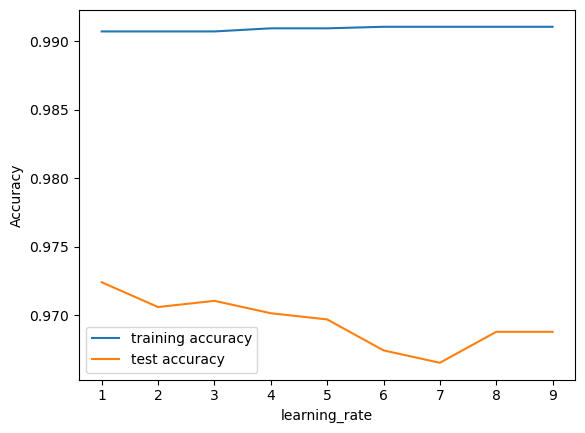

In [61]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [62]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [63]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [64]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [65]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.986
Multi-layer Perceptron : Accuracy on test Data: 0.971

Multi-layer Perceptron : f1_score on training Data: 0.987
Multi-layer Perceptron : f1_score on test Data: 0.987

Multi-layer Perceptron : Recall on training Data: 0.987
Multi-layer Perceptron : Recall on test Data: 0.980

Multi-layer Perceptron : precision on training Data: 0.987
Multi-layer Perceptron : precision on test Data: 0.968


In [66]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [67]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [68]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.957,0.962,0.991,0.993
5,Random Forest,0.965,0.968,0.992,0.990
6,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
7,CatBoost Classifier,0.972,0.975,0.994,0.989
8,Multi-layer Perceptron,0.971,0.974,0.987,0.987


In [69]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [70]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Multi-layer Perceptron,0.971,0.974,0.987,0.987
3,Random Forest,0.965,0.968,0.992,0.990
4,Support Vector Machine,0.964,0.968,0.980,0.965
5,Decision Tree,0.957,0.962,0.991,0.993
6,K-Nearest Neighbors,0.956,0.961,0.991,0.989
7,Logistic Regression,0.934,0.941,0.943,0.927
8,Naive Bayes Classifier,0.605,0.454,0.292,0.997


## Storing Best Model

In [71]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [72]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

In [80]:

# load model from file
gbc = pickle.load(open("pickle/model.pkl", "rb"))
# make predictions for test data


In [86]:
from feature import FeatureExtraction
t=input()
obj = FeatureExtraction(t)
x = np.array(obj.getFeaturesList()).reshape(1,30)
y_pred =gbc.predict(x)[0]
y_pro_phishing = gbc.predict_proba(x)[0,0]
y_pro_non_phishing = gbc.predict_proba(x)[0,1]
        # if(y_pred ==1 ):
pred = "It is {0:.2f} % safe to go ".format(y_pro_non_phishing*100)
print(pred)

https://www.youtube.com/watch?v=svQ2uklES-Y
It is 97.67 % safe to go 


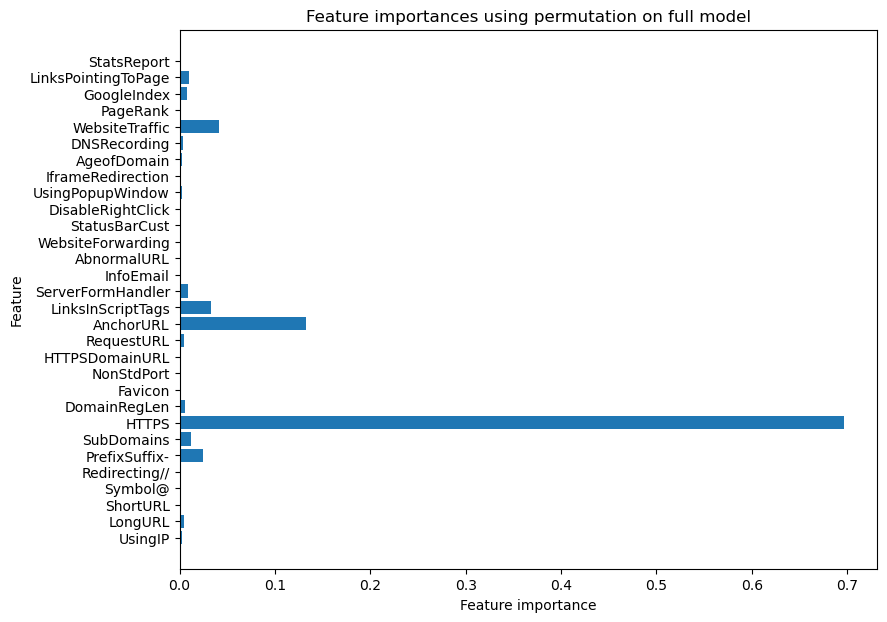

In [73]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()